In [8]:
import pandas as pd

df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [10]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [12]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Unit_normalized', 'Sales_normalized']] = scaler.fit_transform(df[['Unit', 'Sales']])
df[['Unit', 'Unit_normalized', 'Sales', 'Sales_normalized']].head()

,Unit,Unit_normalized,Sales,Sales_normalized
0,8,0.095238,20000,0.095238
1,8,0.095238,20000,0.095238
2,4,0.031746,10000,0.031746
3,15,0.206349,37500,0.206349
4,3,0.015873,7500,0.015873


In [15]:
grouped = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
grouped.head()

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000


### Why GroupBy is Used

The `groupby()` function is useful for **chunking** data — i.e., aggregating or summarizing sales by State and Group.

This helps AAL:
- Compare sales performance across states and demographics
- Make targeted decisions for low-performing segments
- Avoid merging raw data unnecessarily, preserving detail

Hence, chunking using `groupby()` is the recommended use here.

In [16]:
import numpy as np
from scipy import stats

print("Sales Analysis:")
print("Mean:", df['Sales'].mean())
print("Median:", df['Sales'].median())
print("Mode:", df['Sales'].mode()[0])
print("Standard Deviation:", df['Sales'].std())

print("\nUnit Analysis:")
print("Mean:", df['Unit'].mean())
print("Median:", df['Unit'].median())
print("Mode:", df['Unit'].mode()[0])
print("Standard Deviation:", df['Unit'].std())

Sales Analysis:
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Standard Deviation: 32253.506943966073

Unit Analysis:
Mean: 18.00542328042328
Median: 14.0
Mode: 9
Standard Deviation: 12.90140277758643


### Descriptive Statistics Interpretation

Descriptive statistics help AAL understand central tendencies and variability in their sales and unit volumes.

- **Mean**: Represents the average performance.
- **Median**: Useful for identifying skewed data.
- **Mode**: Helps detect most frequent sales values.
- **Standard Deviation**: Indicates how consistent or varied the sales are.

This summary helps drive pricing, supply chain, and production decisions.


In [17]:
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
group_sales

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

### Group Sales Ranking

This analysis shows which demographic group generated the highest and lowest sales in the fourth quarter.

The group with the **highest** total sales reflects the most valuable segment, while the group with the **lowest** may need targeted strategies to boost performance.


In [18]:
df.set_index('Date', inplace=True)
weekly_sales = df.resample('W')['Sales'].sum()
weekly_sales.head()

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
Freq: W-SUN, Name: Sales, dtype: int64

### Weekly Sales Report

The weekly sales report helps the company observe performance trends across different weeks in the fourth quarter. These insights are useful for demand forecasting and marketing campaign timing.


In [19]:
monthly_sales = df.resample('ME')['Sales'].sum()
quarterly_sales = df.resample('QE')['Sales'].sum()

print("Monthly Sales:\n", monthly_sales)
print("\nQuarterly Sales:\n", quarterly_sales)

Monthly Sales:
 Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

Quarterly Sales:
 Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


### Monthly and Quarterly Sales Reports

The monthly and quarterly reports give a higher-level view of overall business performance. These summaries assist AAL leadership in evaluating long-term trends and allocating marketing budgets more strategically.


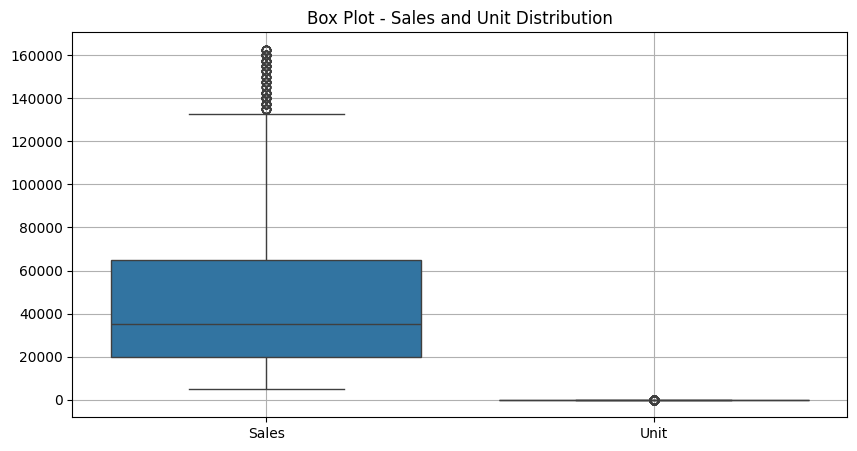

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title('Box Plot - Sales and Unit Distribution')
plt.grid(True)
plt.show()

### Box Plot for Descriptive Statistics

The box plot shows the spread and outliers in Sales and Units. It helps the Sales & Marketing team detect high-variance segments or anomalies in revenue and volume.


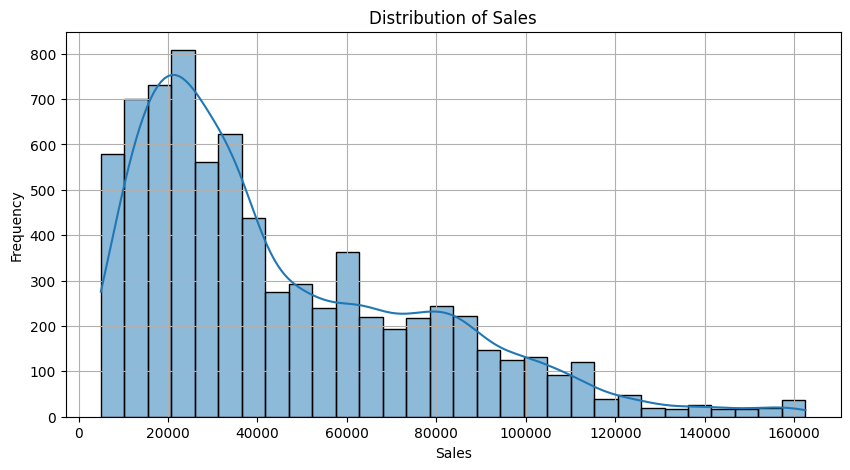

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution Plot - Sales

The distribution plot shows how Sales values are spread out:

- The curve is slightly right-skewed, suggesting higher frequency of mid-range sales.
- A long tail on the right indicates the presence of high-value outliers.
- This helps the S&M team understand common vs. rare sales volumes when designing promotions or forecasting demand.


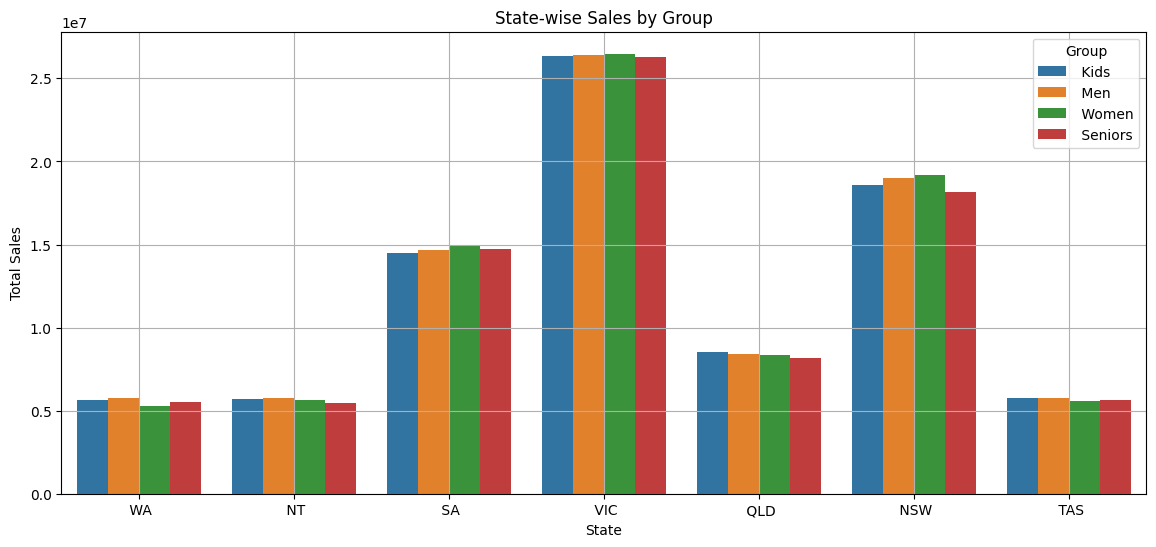

In [24]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator='sum', errorbar=None)
plt.title('State-wise Sales by Group')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Group')
plt.show()

### State-wise Sales by Group

This grouped bar chart highlights total sales across different Australian states, broken down by customer group:

- It helps identify which states and groups (Kids, Men, Women, Seniors) drive the most revenue.
- Underperforming combinations can be targeted for sales programs or promotions.

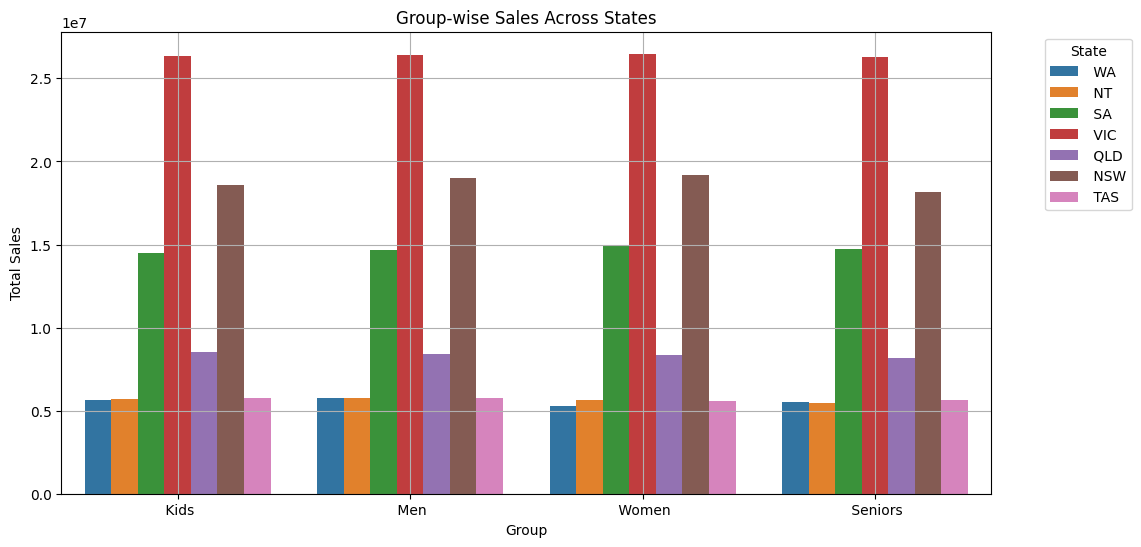

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Group', y='Sales', hue='State', estimator='sum', errorbar=None)
plt.title('Group-wise Sales Across States')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Group-wise Sales Across States

This chart flips the previous perspective, focusing on how each customer group contributes to sales across different states.

It helps AAL understand which states perform best for each demographic, enabling tailored regional strategies.

In [29]:
df['Sales'].dtype

dtype('int64')

In [31]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [32]:
df['Time'] = df['Time'].str.strip().str.capitalize()

In [33]:
df['Time'].unique()


array(['Morning', 'Afternoon', 'Evening'], dtype=object)

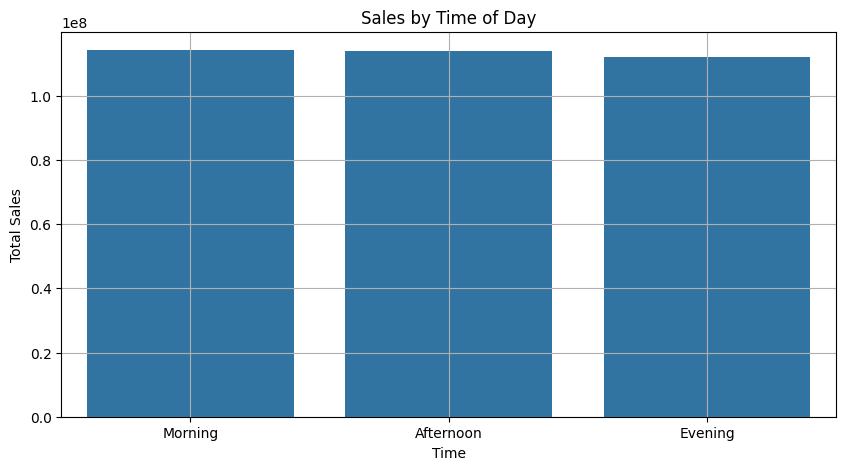

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Time', y='Sales', estimator='sum', errorbar=None, order=['Morning', 'Afternoon', 'Evening'])
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Sales by Time of Day

This chart shows sales distribution across Morning, Afternoon, and Evening.

Insights:
- All time slots contribute fairly evenly, but any slight variations can help optimize staffing, promotional timing, and logistics planning.
- The Sales & Marketing team can use this to time "Next Best Offers" or targeted notifications.


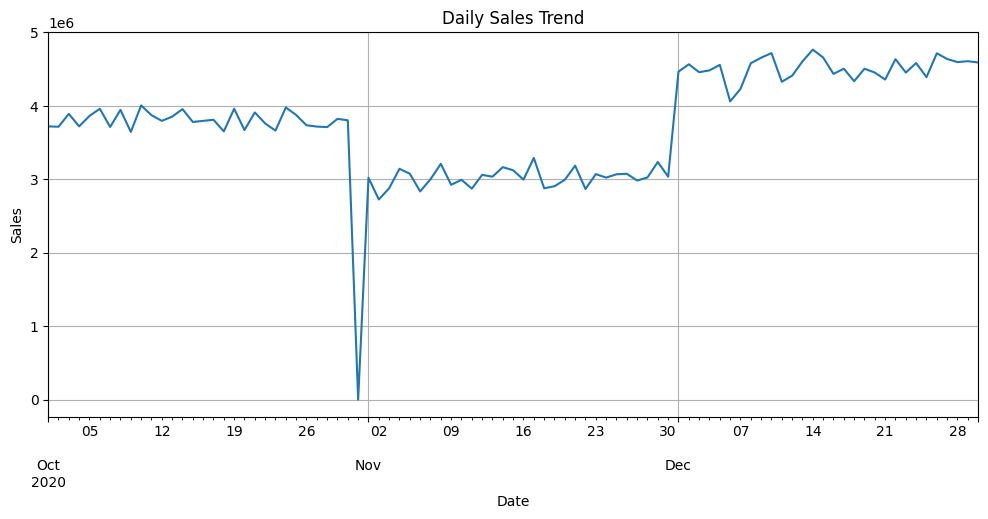

In [35]:
plt.figure(figsize=(12, 5))
df.resample('D')['Sales'].sum().plot()
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


### Daily Sales Trend

This line plot shows daily fluctuations in sales throughout Q4.

- It helps detect short-term spikes or dips (e.g., sales events, supply issues).
- Daily trends guide operational decisions like staffing, inventory restocking, and fulfillment planning.


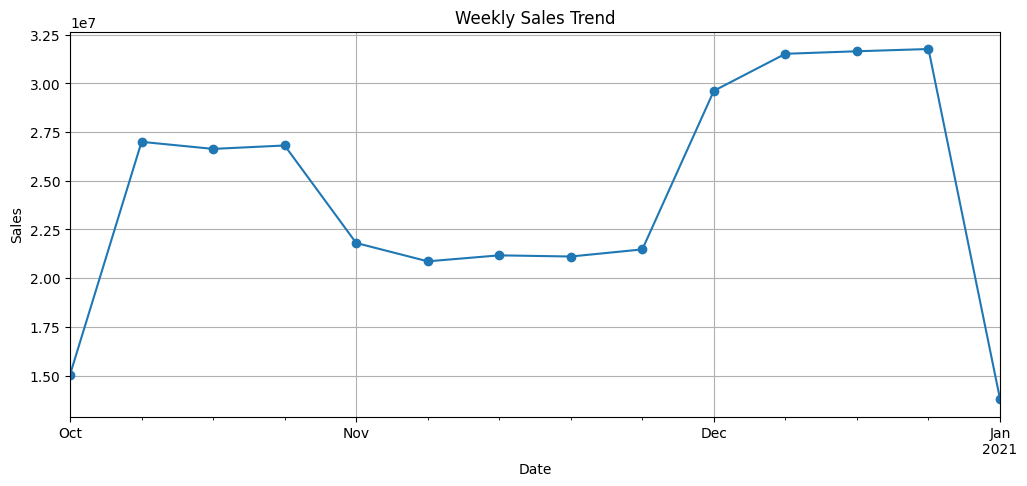

In [36]:
plt.figure(figsize=(12, 5))
df.resample('W')['Sales'].sum().plot(marker='o')
plt.title('Weekly Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


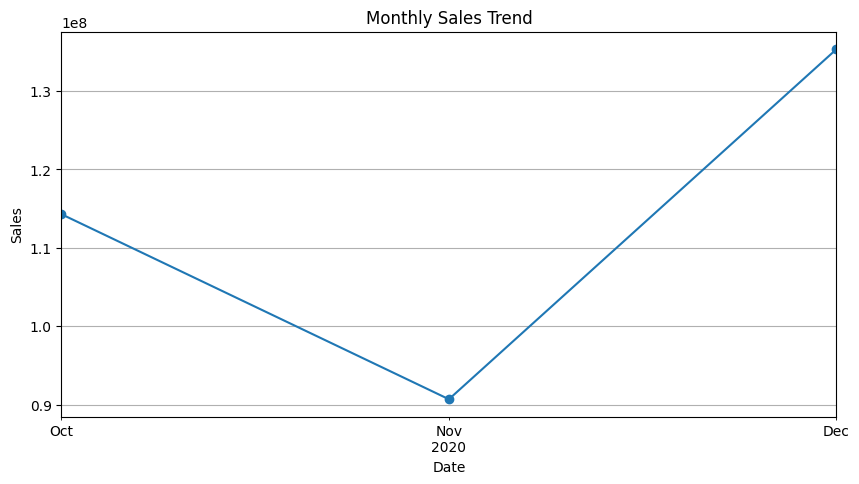

In [38]:
plt.figure(figsize=(10, 5))
df.resample('ME')['Sales'].sum().plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


/opt/anaconda3/envs/salesproj/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


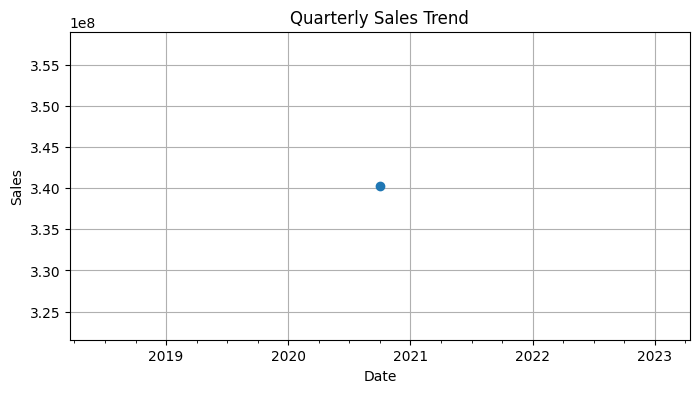

In [40]:
plt.figure(figsize=(8, 4))
df.resample('QE')['Sales'].sum().plot(marker='o')
plt.title('Quarterly Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


### Weekly, Monthly, and Quarterly Sales Trends

These line plots give an aggregated view of sales patterns over time:

- **Weekly** trend shows mid-term fluctuations for operational planning.
- **Monthly** trend reveals consistent growth or drop patterns.
- **Quarterly** trend here has only one value (Q4 2020), but it lays the foundation for longer-term planning in future quarters.
